<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Advance_Regression/02-01-03-glm-probit-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3. Probit Regression

Probit regression model is a statistical technique used to model binary response variables. It estimates the probability of an event occurring based on various predictor variables. This probability is represented using the cumulative distribution function (CDF) of a normal distribution, making probit regression a solid alternative to logistic regression when the normality assumptions are met. In this tutorial, we will provide an overview of the Probit Model. We will walk through a manual fitting process using maximum likelihood estimation (MLE) to understand the mechanics behind the model. Then, we will demonstrate how to fit a probit model in R using the `glm()` function. We'll also cover how to interpret the model outputs, evaluate model performance, and visualize the results using different R packages. By the end of this tutorial, you will have a solid understanding of the probit model and how to apply it in R for your research or projects. Let’s get started!


## Overview

**Probit** regression is a statistical technique that is used for analyzing binary or dichotomous outcomes, where the dependent variable can take on only two possible values, usually coded as 0 and 1. This technique is similar to logistic regression in that it models the probability of the dependent variable being one of the two possible outcomes.

In probit regression, the relationship between predictor variables and the probability of the outcome is modeled using the cumulative distribution function (CDF) of the standard normal distribution, which is known as the probit function. The probit function maps any real-valued input to a probability between 0 and 1, and it is used to model the probability that a binary outcome will be positive (or negative) given the values of the predictor variables.

When using probit regression, the coefficients of the model represent the change in the probability of the outcome associated with a unit change in the predictor variable. These coefficients are estimated using maximum likelihood estimation, which is a statistical technique used for estimating the parameters of a probability distribution by maximizing a likelihood function.

***

1. Model Specification:

- Assume $Y \sim \text{Bernoulli}(p)$, where $p$ is the probability that $Y = 1$.

- The probit model uses the standard normal cumulative distribution function (CDF)$\Phi$ to model $p$ as:

$$  p = \Phi(X\beta)$$

- This means:

$$   P(Y = 1 | X) = \int_{-\infty}^{X\beta} \frac{1}{\sqrt{2 \pi}} e^{-\frac{t^2}{2}} \, dt $$

2. Link Function:

- The probit link function is $g(p) = \Phi^{-1}(p)$, where $\Phi$ is the CDF of the standard normal distribution.

3. Parameter Estimation:

- Maximum likelihood estimation (MLE) is also used here.

- The log-likelihood function for the probit model is:

$$ \ln \mathcal{L}(\beta) = \sum_{i=1}^{n} \left( Y_i \ln(\Phi(X_i\beta)) + (1 - Y_i) \ln(1 - \Phi(X_i\beta)) \right) $$

- Numerical optimization methods are required to maximize the log-likelihood and estimate $\beta$.

4. Prediction:

- For a new observation $X$, predict the probability of $Y = 1$) as:

$$  p = \Phi(X\beta) $$

5. Interpretation:

- Coefficients $\beta_j$ represent the change in the z-score (from the standard normal distribution) associated with a one-unit increase in $X_j$. Risk ratios are exponential of Coefficients $\beta_j$.

***Difference between Logistic and Probit Models***

Probit regression and logistic regression are both used for modeling binary outcomes, but they differ in the way they model the relationship between the predictors and the probability of the outcome. Here are the key differences between probit and logistic regression:

1.  **Link function**:

In probit regression, the link function is the cumulative distribution function (CDF) of the standard normal distribution, also known as the probit function. This method models the linear combination of predictors as the inverse of the CDF of a standard normal distribution. On the other hand, logistic regression uses the logistic function, also known as the sigmoid function, as the link function. This method models the log-odds of the outcome being in one of the categories as a linear combination of predictors.

2.  **Interpretation of coefficients**:

In logistic regression, the coefficients represent the change in the log-odds of the outcome for a one-unit change in the predictor, assuming other predictors remain constant. This makes it straightforward to interpret the impact of each predictor variable on the outcome in terms of odds ratios or probabilities. For example, if the coefficient for a predictor is 0.5, it means that a one-unit increase in that predictor is associated with a 50% increase in the odds of the outcome.

On the other hand, in probit regression, coefficients are interpreted in terms of standard deviations of the latent variable, which is the unobservable variable underlying the binary outcome. While this interpretation might be less intuitive for some users, it still provides valuable information about the relationship between predictors and the probability of the outcome. However, converting these coefficients into easily interpretable odds ratios or probabilities is not as straightforward as in logistic regression.

Overall, while logistic regression coefficients offer more direct interpretability in terms of odds ratios or probabilities, probit regression coefficients still provide valuable insights into the relationship between predictors and the probability of the outcome, albeit with a slightly different interpretation approach. The choice between logistic and probit regression often depends on the specific needs of the analysis and the preferences of the researcher.

3.  **Ease to interpretation**:

Logistic regression coefficients are more straightforward to interpret as they indicate changes in log-odds, which can be easily converted into odds ratios or probabilities. On the other hand, probit regression coefficients are interpreted in terms of standard deviations of the latent variable, which may be less intuitive for some users.

4.  **Assumptions**:

Probit regression assumes that the errors follow a normal distribution, while logistic regression assumes that the errors follow a logistic distribution. Both models require that the relationship between the predictors and the outcome is linear on the logit or probit scale. This means that the effect of a predictor on the outcome is proportional to the logarithm of the odds ratio or the cumulative distribution function of the standard normal distribution.

5.  **Applications**:

Probit regression is commonly used in economics and social sciences, while logistic regression is widely used in various fields, including medicine, biology, social sciences, and machine learning, due to its simplicity and ease of interpretation.

In practice, both probit and logistic regression can be suitable for modeling binary outcomes, and the choice between them often depends on the specific requirements of the analysis and the preferences of the researcher.


## Install rpy2

In [2]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp311-cp311-linux_x86_64.whl


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Probit Model  from Scratch

Building a Probit model from scratch in R involves generating synthetic data, implementing the model fitting process, creating a summary table for model parameters, performing cross-validation, and evaluating model performance. Here’s a step-by-step guide on how to accomplish this in R without using any external packages.

### Data Generation

Let's start by generating synthetic data with four covariates and a binary outcome.

In [ ]:
%%R
set.seed(123)

# Generate data with 1000 observations
n <- 1000

# Generate four covariates
X1 <- rnorm(n)
X2 <- rnorm(n)
X3 <- rnorm(n)
X4 <- rnorm(n)

# True coefficients for the model
beta_true <- c(0.5, -1.0, 0.8, -0.6, 1.2)  # Intercept and 4 coefficients

# Calculate the latent variable (linear combination of predictors and coefficients)
latent_variable <- beta_true[1] + beta_true[2]*X1 + beta_true[3]*X2 + beta_true[4]*X3 + beta_true[5]*X4

# Generate binary outcome Y based on the latent variable, with some noise
Y <- ifelse(latent_variable + rnorm(n) > 0, 1, 0)

# Combine data into a data frame
data <- data.frame(Y, X1, X2, X3, X4)

### Model Fitting

Now, we define a function to fit the Probit model using maximum likelihood estimation. We use the cumulative distribution function (CDF) of the normal distribution to transform the linear predictor into probabilities, then maximize the log-likelihood function.

In [ ]:
%%R
# Define the log-likelihood function for the Probit model
log_likelihood <- function(beta, Y, X) {
  # Calculate linear predictor
  linear_pred <- X %*% beta
  # Get the predicted probabilities using the normal CDF
  p <- pnorm(linear_pred)
  # Calculate the log-likelihood
  ll <- sum(Y * log(p) + (1 - Y) * log(1 - p))
  return(-ll)  # Return the negative log-likelihood for minimization
}

# Function to fit the Probit model
fit_probit <- function(Y, X) {
  # Add an intercept column to the predictors matrix
  X <- as.matrix(cbind(1, X))
  # Initial parameter values for optimization
  initial_beta <- rep(0, ncol(X))
  # Perform optimization to maximize the log-likelihood
  fit <- optim(initial_beta, log_likelihood, Y = Y, X = X, method = "BFGS", hessian = TRUE)
  return(list(coefficients = fit$par, hessian = fit$hessian, convergence = fit$convergence))
}

# Fit the Probit model to the generated data
fit <- fit_probit(data$Y, data[, -1])  # Exclude Y column for predictors

### Summary Statistic Table

We use the fitted model to calculate standard errors, z-values, and p-values for each coefficient.

In [ ]:
%%R
# Function to create a summary table for the model
create_summary_table <- function(fit) {
  # Extract estimated coefficients
  beta_hat <- fit$coefficients

  # Calculate covariance matrix (inverse of negative Hessian)
  hessian <- fit$hessian
  cov_matrix <- solve(-hessian)

  # Calculate standard errors from the covariance matrix
  standard_errors <- sqrt(diag(cov_matrix))

  # Calculate z-values and p-values
  z_values <- beta_hat / standard_errors
  p_values <- 2 * (1 - pnorm(abs(z_values)))

  # Create the summary table
  summary_table <- data.frame(
    Coefficient = beta_hat,
    Std.Error = standard_errors,
    z.value = z_values,
    p.value = p_values
  )

  # Label the rows
  rownames(summary_table) <- c("Intercept", "X1", "X2", "X3", "X4")

  return(summary_table)
}

# Generate summary table
summary_table <- create_summary_table(fit)
print(summary_table)

          Coefficient Std.Error z.value p.value
Intercept   0.4950479       NaN     NaN     NaN
X1         -1.0312880       NaN     NaN     NaN
X2          1.0020371       NaN     NaN     NaN
X3         -0.6179513       NaN     NaN     NaN
X4          1.2137153       NaN     NaN     NaN


### Risk Ratios

In a probit model, the **risk ratio** isn’t calculated directly in the same way as it would be for a linear model or a log-binomial model. This is because the probit model uses the cumulative distribution function of a standard normal distribution (Φ) to estimate the probability of an outcome, based on the relationship:

$$ P(Y=1∣X)=Φ(Xβ)$$

-   where $X$ is your predictor, then calculate:

    $$ P(Y=1∣X=1)=Φ(β0+β1)$$

    and

    $$ P(Y=1∣X=0)=Φ(β0) $$

-   **Approximate the Risk Ratio**: Compute the ratio of these two predicted probabilities:

    $$ text{Approximate Risk Ratio} = \frac{P(Y = 1 | X = 1)}{P(Y = 1 | X = 0)} $$

where $\Phi$ is the cumulative distribution function of the standard normal distribution, $X$ represents the predictors, and $\beta$ represents the coefficients


In [ ]:
%%R
# Extract coefficients
coeffecients<- summary_table$Coefficient
beta_0<-coeffecients[1] # Intercept
beta_1<-coeffecients[2]  # Coefficient for X1

# Calculate predicted probabilities at X = 1 and X = 0
p_X1 <- pnorm(beta_0 + beta_1)  # Probability when X = 1
p_X0 <- pnorm(beta_0)           # Probability when X = 0

# Calculate approximate risk ratio
approx_risk_ratio <- p_X1 / p_X0
cat("Approximate Risk Ratio:", approx_risk_ratio, "\n")

Approximate Risk Ratio: 0.4290113 


### Cross-Validation

We implement k-fold cross-validation (using `k=5` as an example) to evaluate the model’s performance.

In [ ]:
%%R
# Define a function for k-fold cross-validation
cross_validation_probit <- function(data, k = 5) {
  n <- nrow(data)
  # Randomly shuffle and split data into k folds
  fold_indices <- sample(rep(1:k, length.out = n))
  accuracies <- numeric(k)  # Store accuracy for each fold

  for (i in 1:k) {
    # Split data into training and testing sets
    train_data <- data[fold_indices != i, ]
    test_data <- data[fold_indices == i, ]

    # Fit the model on training data
    fit <- fit_probit(train_data$Y, train_data[, -1])
    beta_hat <- fit$coefficients  # Access estimated coefficients

    # Make predictions on the test set
    X_test <- as.matrix(cbind(1, test_data[, -1]))  # Add intercept
    linear_pred <- X_test %*% beta_hat
    probabilities <- pnorm(linear_pred)  # Predicted probabilities
    predictions <- ifelse(probabilities > 0.5, 1, 0)  # Binary predictions

    # Calculate accuracy
    accuracies[i] <- mean(predictions == test_data$Y)
  }

  # Return the average accuracy across all folds
  return(mean(accuracies))
}

# Perform 5-fold cross-validation
set.seed(456)  # For reproducibility
cv_accuracy <- cross_validation_probit(data, k = 5)
cat("Average Accuracy from 5-Fold Cross-Validation:", cv_accuracy, "\n")

Average Accuracy from 5-Fold Cross-Validation: 0.851 


### Model Evaluation

Finally, we evaluate the fitted model on the entire dataset, calculating the accuracy, sensitivity, and specificity.

In [ ]:

%%R
# Model evaluation on the entire dataset
evaluate_probit_model <- function(Y, X, beta_hat) {
  # Make predictions on the dataset
  X <- as.matrix(cbind(1, X))  # Add intercept
  linear_pred <- X %*% beta_hat
  probabilities <- pnorm(linear_pred)  # Get predicted probabilities
  predictions <- ifelse(probabilities > 0.5, 1, 0)  # Convert to binary outcome

  # Calculate accuracy
  accuracy <- mean(predictions == Y)

  # Calculate sensitivity and specificity
  true_positives <- sum(predictions == 1 & Y == 1)
  true_negatives <- sum(predictions == 0 & Y == 0)
  false_positives <- sum(predictions == 1 & Y == 0)
  false_negatives <- sum(predictions == 0 & Y == 1)

  sensitivity <- true_positives / (true_positives + false_negatives)
  specificity <- true_negatives / (true_negatives + false_positives)

  # Create an evaluation table
  evaluation <- data.frame(
    Metric = c("Accuracy", "Sensitivity", "Specificity"),
    Value = c(accuracy, sensitivity, specificity)
  )

  return(evaluation)
}

# Evaluate the model on the entire dataset
evaluation_results <- evaluate_probit_model(data$Y, data[, -1], fit$coefficients)
print(evaluation_results)

       Metric     Value
1    Accuracy 0.8510000
2 Sensitivity 0.8870432
3 Specificity 0.7964824


##  Probit Model in R

If you want to run a **probit** regression in R, it's just like running a logistic regression. But instead of log-odds, your outcomes will be in z-score units. However, z-score units are not easy to understand and may not be useful for the readers. In probit regression, you cannot use an odds ratio because we are not working with odds or log-odds outcomes anymore. Instead, we rely on probability to interpret the results. If you want to understand how R calculates probability from z-score units, you need to know your z-score tables and normal distribution functions. Calculating probability from a normal distribution is complicated, so we use approximation, which is what z-tables are for. In practice, we use the `ggpredict()` and `margins()` functions to predict probabilities and marginal effects, respectively, from our coefficients.

### Check and Install Required R Packages

Before running the code, make sure you have the following R packages installed: `tidyverse`, `plyr`, `rstaix`, `DataExplorer`, `patchwork`, `RColorBrewer`, `corrplot`, `ggstatsplot`, `sjPlot`, `gtsummary`, `jtools`, `report`, `performance`, `margins`, `ggeffects` and `marginaleffects`. You can install these packages using the following code:




In [3]:
%%R
packages <- c(
  "tidyverse",
  "plyr",
  "rstatix",
  "DataExplorer",
  "patchwork",
  "RColorBrewer",
  "DataExplorer",
  "corrplot",
  "ggstatsplot",
  "sjPlot",
  "gtsummary",
  "jtools",
  "report",
  "performance",
  "margins",
  "marginaleffects",
  "ggeffects"
)


In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
      tidyverse            plyr         rstatix    DataExplorer       patchwork 
           TRUE            TRUE            TRUE            TRUE            TRUE 
   RColorBrewer    DataExplorer        corrplot     ggstatsplot          sjPlot 
           TRUE            TRUE            TRUE            TRUE            TRUE 
      gtsummary          jtools          report     performance         margins 
           TRUE            TRUE            TRUE            TRUE            TRUE 
marginaleffects       ggeffects 
           TRUE            TRUE 


### Load packages

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:ggeffects"       "package:marginaleffects"
 [3] "package:margins"         "package:performance"    
 [5] "package:report"          "package:jtools"         
 [7] "package:gtsummary"       "package:sjPlot"         
 [9] "package:ggstatsplot"     "package:corrplot"       
[11] "package:RColorBrewer"    "package:patchwork"      
[13] "package:DataExplorer"    "package:rstatix"        
[15] "package:plyr"            "package:lubridate"      
[17] "package:forcats"         "package:stringr"        
[19] "package:dplyr"           "package:purrr"          
[21] "package:readr"           "package:tidyr"          
[23] "package:tibble"          "package:ggplot2"        
[25] "package:tidyverse"       "package:tools"          
[27] "package:stats"           "package:graphics"       
[29] "package:grDevices"       "package:utils"          
[31] "package:datasets"        "package:methods"        
[33] "package:base"           


### Data

In this exercise we will use [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). This dataset was obtained from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal of this dataset is to predict whether or not a patient has diabetes, using specific diagnostic measurements included in the data. Some limitations were put in place while selecting instances from a larger database. Specifically, all the patients in this dataset are female, at least 21 years old, and of Pima Indian ancestry.

In [ ]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/puma_diabetes.csv") |>
  glimpse()

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Preg, Gluc, BP, Skin, Insulin, BMI, DPF, Age, Outcome

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 768
Columns: 9
$ Preg    <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, 5, 7, 0, 7, 1, 1,…
$ Gluc    <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139, …
$ BP      <dbl> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0, …
$ Skin    <dbl> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0,…
$ Insulin <dbl> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230,…
$ BMI     <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0.0, 37.…
$ DPF     <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,…
$ Age     <dbl> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32…
$ Ou


* Preg - Number of times pregnant	Numeric	[0, 17]

* Gluc - 	Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)	Numeric	[0, 199]

* BP - 	Diastolic Blood Pressure (mm Hg)	Numeric	[0, 122]

* Skin - Triceps skin fold thickness (mm)	Numeric	[0, 99]

* Insulin - 	2-Hour Serum insulin (µh/ml)	Numeric	[0, 846]

* BMI	- Body mass index [weight in kg/(Height in m)]	Numeric	[0, 67.1]

* DPF - 	Diabetes pedigree function	Numeric	[0.078, 2.42]

* Age - 	Age (years)	Numeric	[21, 81].

* Outcome - Binary value indicating non-diabetic /diabetic	Factor	[0,1]

Source:Chang V, Bailey J, Xu QA, Sun Z. [Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8943493/). Neural Comput Appl. 2022 Mar 24:1-17. doi: 10.1007/s00521-022-07049-z. Epub ahead of print. PMID: 35345556; PMCID: PMC8943493.



#### Plot basic data information

`plot_intro()` function of {DataExplorer} package plot basic information (from introduce) the data.

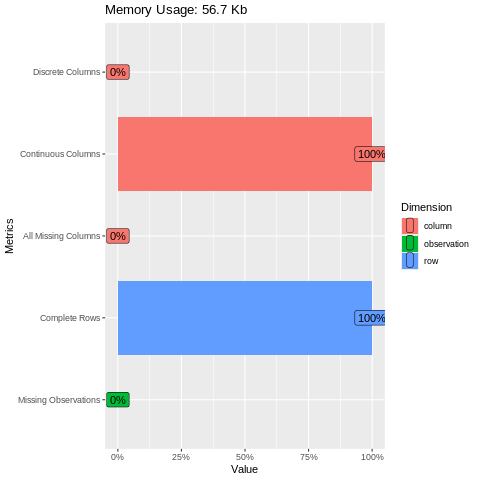

In [ ]:
%%R
mf  |>
   plot_intro()

#### Summary Statistics

In [ ]:
%%R
mf |>
  # select variables
  dplyr::select (Preg, Gluc, BP,
                Skin, Insulin, BMI,
                BP, Age) |>
  get_summary_stats (type = "common")

# A tibble: 7 × 10
  variable     n   min   max median   iqr   mean     sd    se    ci
  <fct>    <dbl> <dbl> <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl>
1 Preg       768     0  17      3     5     3.84   3.37 0.122 0.239
2 Gluc       768     0 199    117    41.2 121.    32.0  1.15  2.26 
3 BP         768     0 122     72    18    69.1   19.4  0.698 1.37 
4 Skin       768     0  99     23    32    20.5   16.0  0.576 1.13 
5 Insulin    768     0 846     30.5 127.   79.8  115.   4.16  8.16 
6 BMI        768     0  67.1   32     9.3  32.0    7.88 0.284 0.558
7 Age        768    21  81     29    17    33.2   11.8  0.424 0.833


#### Correlation

In [ ]:
%%R
cor_data<- mf |>
  # select variables
  dplyr::select (Preg, Gluc, BP,
                Skin, Insulin, BMI,
                BP, Age) |>
         cor()
cor_data

               Preg       Gluc         BP        Skin     Insulin        BMI
Preg     1.00000000 0.12945867 0.14128198 -0.08167177 -0.07353461 0.01768309
Gluc     0.12945867 1.00000000 0.15258959  0.05732789  0.33135711 0.22107107
BP       0.14128198 0.15258959 1.00000000  0.20737054  0.08893338 0.28180529
Skin    -0.08167177 0.05732789 0.20737054  1.00000000  0.43678257 0.39257320
Insulin -0.07353461 0.33135711 0.08893338  0.43678257  1.00000000 0.19785906
BMI      0.01768309 0.22107107 0.28180529  0.39257320  0.19785906 1.00000000
Age      0.54434123 0.26351432 0.23952795 -0.11397026 -0.04216295 0.03624187
                Age
Preg     0.54434123
Gluc     0.26351432
BP       0.23952795
Skin    -0.11397026
Insulin -0.04216295
BMI      0.03624187
Age      1.00000000


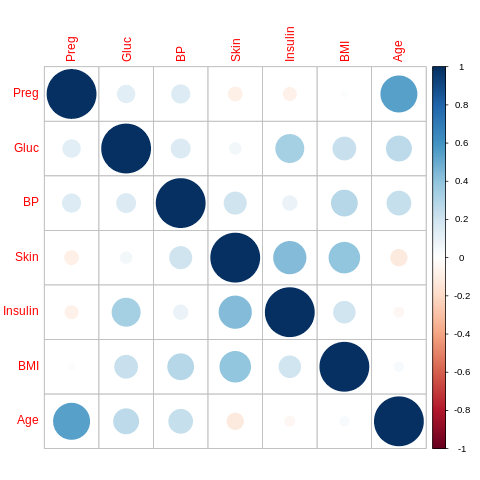

In [ ]:
%%R
corrplot::corrplot(cor_data)

#### Box/Violine plots

We can create a nice looking plots with results of ANOVA and post-hoc tests on the same plot (directly on the boxplots). We will use `gbetweenstats()` function of {ggstatsplot} package:

In [ ]:
%%R
p1<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Outcome,
  y = Preg,
  ylab = "Number of times pregnant",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Number of times pregnant") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

p2<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Outcome,
  y = Gluc,
  ylab = "Glucose concentration",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("	Plasma glucose concentration") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

p3<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Outcome,
  y = BMI,
  ylab = "Body mass index",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Body mass index") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))


p4<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Outcome,
  y = BP,
  ylab = "Blood Pressure (mm Hg)",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Diastolic Blood Pressure (mm Hg)") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

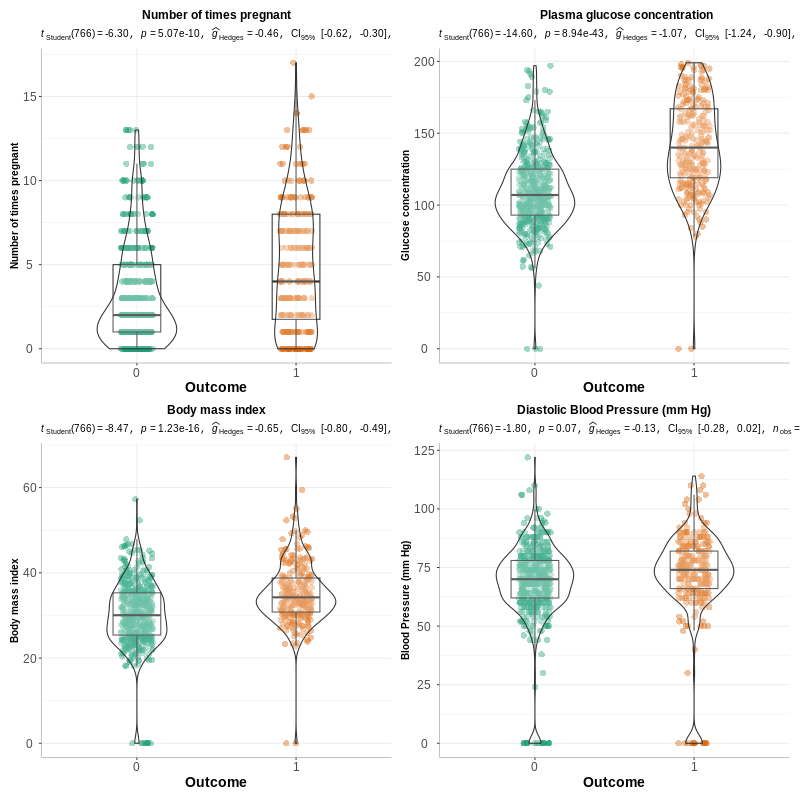

In [ ]:
%%R -w 800 -h 800 -u px
(p1|p2)/(p3|p4)

#### Split Data

In [ ]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(mf,.(Outcome),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(mf, .(Outcome),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

print(prop.table(table(train$Outecome)))
print(prop.table(table(test$Outcome)))

numeric(0)

        0         1 
0.6493506 0.3506494 


### Fit a Probit Model

We will use **Probit regression** to predict customer feed back based on various attributes related to occupation, family Size, location etc. We will use `glm()` function with `family = binomial(link = "probit"))` for probit regression.

In [ ]:
%%R
fit.probit<-glm(Outcome~., data= train,
             family = binomial(link = "probit"))

In [ ]:
%%R
summary(fit.probit)


Call:
glm(formula = Outcome ~ ., family = binomial(link = "probit"), 
    data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.9275039  0.4720802 -10.438  < 2e-16 ***
Preg         0.0622470  0.0234914   2.650  0.00805 ** 
Gluc         0.0222748  0.0026113   8.530  < 2e-16 ***
BP          -0.0105857  0.0039040  -2.712  0.00670 ** 
Skin        -0.0032830  0.0048758  -0.673  0.50075    
Insulin     -0.0001881  0.0006710  -0.280  0.77928    
BMI          0.0516561  0.0101127   5.108 3.25e-07 ***
DPF          0.5411938  0.2110067   2.565  0.01032 *  
Age          0.0128172  0.0072005   1.780  0.07507 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 694.17  on 536  degrees of freedom
Residual deviance: 491.29  on 528  degrees of freedom
AIC: 509.29

Number of Fisher Scoring iterations: 5



We can see that the `Preg` coefficient is 0.062. Here we can infer that for each unit increase in Preg, the predicted probability of having dibetes increases by a factor of exp(0.062) = 1.06, or about 6%. This effect is statistically significant with a p-value of 0.00805.

In [ ]:
%%R
1-4.9

[1] -3.9


`summ` function of {jtools} produce summary table of regression models:

In [ ]:
%%R
jtools::summ(fit.probit)

MODEL INFO:
Observations: 537
Dependent Variable: Outcome
Type: Generalized linear model
  Family: binomial 
  Link function: probit 

MODEL FIT:
χ²(8) = 202.89, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.43
Pseudo-R² (McFadden) = 0.29
AIC = 509.29, BIC = 547.86 

Standard errors:MLE
------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)         -4.93   0.47   -10.44   0.00
Preg                 0.06   0.02     2.65   0.01
Gluc                 0.02   0.00     8.53   0.00
BP                  -0.01   0.00    -2.71   0.01
Skin                -0.00   0.00    -0.67   0.50
Insulin             -0.00   0.00    -0.28   0.78
BMI                  0.05   0.01     5.11   0.00
DPF                  0.54   0.21     2.56   0.01
Age                  0.01   0.01     1.78   0.08
------------------------------------------------


### Interpretation of Probit Model

We can use `reoprt()` function of {report} package to further explain the `fit.probit` object.

In [ ]:
%%R
report::report(fit.probit)

We fitted a probit model (estimated using ML) to predict Outcome with Preg,
Gluc, BP, Skin, Insulin, BMI, DPF and Age (formula: Outcome ~ Preg + Gluc + BP
+ Skin + Insulin + BMI + DPF + Age). The model's explanatory power is
substantial (Nagelkerke's R2 = 0.43). The model's intercept, corresponding to
Preg = 0, Gluc = 0, BP = 0, Skin = 0, Insulin = 0, BMI = 0, DPF = 0 and Age =
0, is at -4.93 (95% CI [-5.86, -4.04], p < .001). Within this model:

  - The effect of Preg is statistically significant and positive (beta = 0.06,
95% CI [0.02, 0.11], p = 0.008; Std. beta = 0.21, 95% CI [0.06, 0.36])
  - The effect of Gluc is statistically significant and positive (beta = 0.02,
95% CI [0.02, 0.03], p < .001; Std. beta = 0.70, 95% CI [0.55, 0.86])
  - The effect of BP is statistically significant and negative (beta = -0.01, 95%
CI [-0.02, -3.07e-03], p = 0.007; Std. beta = -0.20, 95% CI [-0.34, -0.06])
  - The effect of Skin is statistically non-significant and negative (beta =
-3.28e-03, 95% 

### Risk Ratio

The `tab_model()` function of {sjPlot} package also creates HTML tables from regression models:

In [ ]:
%%R
tab_model(fit.probit)

`plot_model()` function of {sjPlot} package creates plots the estimates from logistic model:

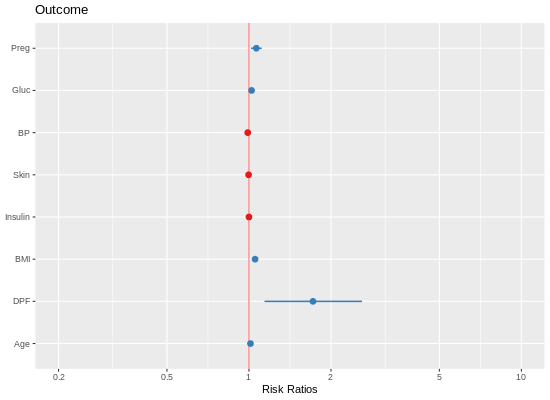

In [ ]:
%%R -w 550 -h 400 -u px
plot_model(fit.probit, vline.color = "red")

### Model Performance

In [ ]:
%%R
performance::performance(fit.probit)

# Indices of model performance

AIC     |    AICc |     BIC | Nagelkerke's R2 |  RMSE | Sigma | Log_loss | Score_log | Score_spherical |   PCP
--------------------------------------------------------------------------------------------------------------
509.288 | 509.629 | 547.862 |           0.434 | 0.384 | 1.000 |    0.457 |      -Inf |           0.006 | 0.702


### Visualization of Model Assumptions

The package **performance** provides many functions to check model assumptions, like `check_collinearity()`, `check_normality()` or `check_heteroscedasticity()`. To get a comprehensive check, use `check_model()`

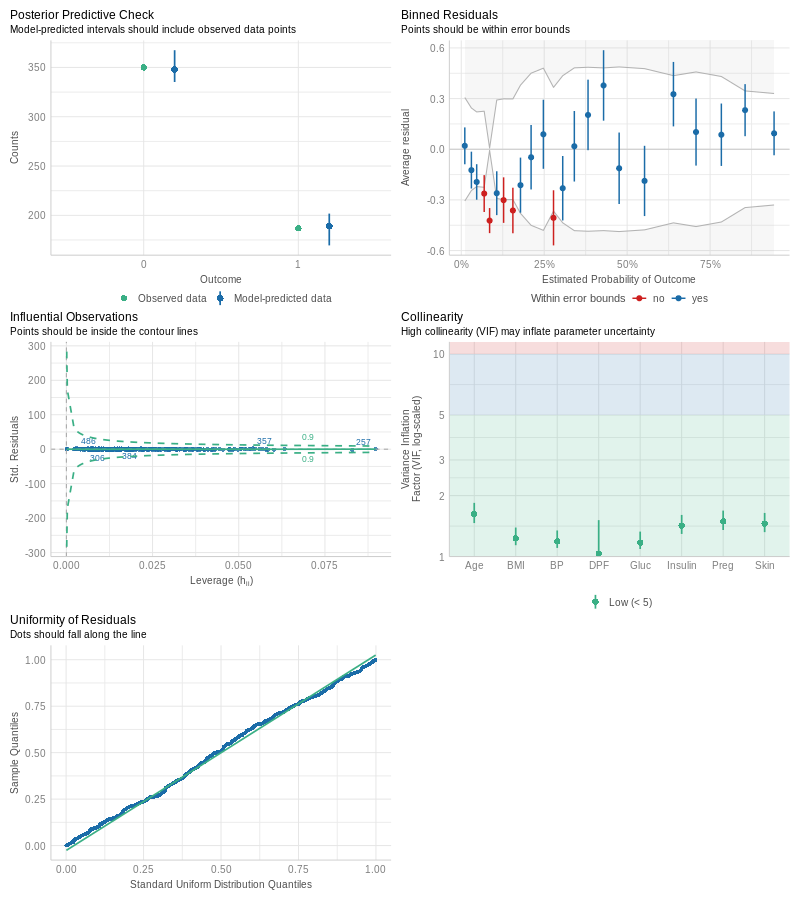

In [ ]:
%%R -w 800 -h 900 -u px
performance::check_model(fit.probit)

### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.


In [ ]:
%%R
margins::margins(fit.probit, variables = "Preg")

    Preg
 0.01609


we get the same marginal effect using `avg_slopes()` function from the {marginaleffects} package

In [ ]:
%%R
marginaleffects::avg_slopes(fit.probit, variables = "Preg")


 Estimate Std. Error   z Pr(>|z|)   S  2.5 % 97.5 %
   0.0161    0.00596 2.7  0.00698 7.2 0.0044 0.0278

Term: Preg
Type:  response 
Comparison: mean(dY/dX)
Columns: term, contrast, estimate, std.error, statistic, p.value, s.value, conf.low, conf.high, predicted_lo, predicted_hi, predicted 



To calculate marginal effects and adjusted predictions, the `predict_response()` function is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.


In [ ]:
%%R
effect<-ggeffects::predict_response(fit.probit, "Preg", margin = "empirical")
effect

# Average predicted probabilities of Outcome

Preg | Predicted |     95% CI
-----------------------------
   0 |      0.22 | 0.16, 0.29
   2 |      0.26 | 0.21, 0.31
   4 |      0.30 | 0.26, 0.35
   6 |      0.35 | 0.29, 0.41
   7 |      0.37 | 0.30, 0.44
   9 |      0.42 | 0.32, 0.52
  11 |      0.47 | 0.33, 0.60
  17 |      0.61 | 0.37, 0.82



Not all rows are shown in the output. Use `print(..., n = Inf)` to show
  all rows.



The relative marginal effects:

In [ ]:
%%R
effect$predicted[2] - effect$predicted[1]

[1] 0.01891575


{ggeffects} supports labelled data and the `plot()`- method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.

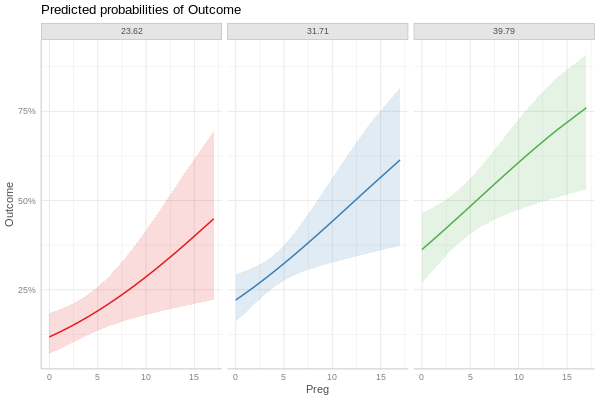

In [ ]:
%%R -w 600 -h 400 -u px
preg.bmi <- predict_response(fit.probit, terms = c("Preg", "BMI"))
plot(preg.bmi, facets = TRUE)

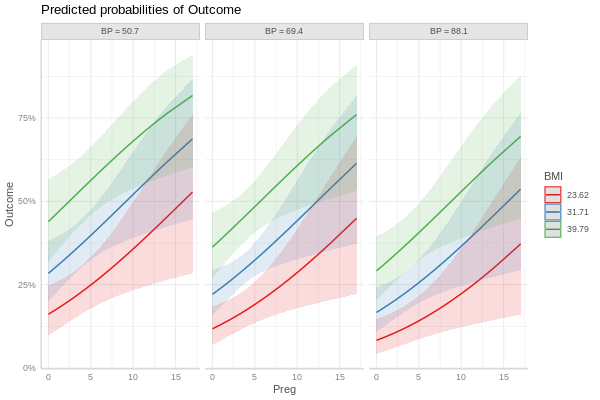

In [ ]:
%%R -w 600 -h 400 -u px
preg.bmi.bp <- predict_response(fit.probit, terms = c("Preg", "BMI", "BP"))
plot(preg.bmi.bp, facets = TRUE)

`geom_smooth()` using formula = 'y ~ x'


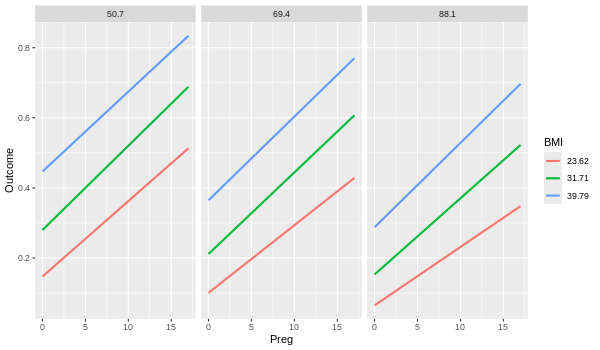

In [ ]:
%%R -w 600 -h 350 -u px
# select specific levels for grouping terms
ggplot(preg.bmi.bp, aes(x = x, y = predicted, colour = group)) +
  stat_smooth(method = "lm", se = FALSE) +
  facet_wrap(~facet) +
  labs(
    y = get_y_title(preg.bmi.bp),
    x = get_x_title(preg.bmi.bp),
    colour = get_legend_title(preg.bmi.bp)
  )

### Relationship between Z-score Outcome and Continuous Covariates

To evaluate the validity the assumption linear relationship between z-score outcome and continuous covariates, we can employ the **probit()** function to predict the outcome in z-score units. We can then save these predictions to our dataset and create a scatter plot that displays the predicted log odds vs the independent variables. To generate the scatter plot, we should create a new dataset that only contains observations from the model and numeric covariates, excluding missing values.

By plotting the predicted log odds against each independent variable, we can visually examine the relationship between the independent variables and the predicted outcome. The lowess line, which is a smoothing line that estimates the underlying trend in the data, can help us identify any non-linear relationships or patterns in the data.

This approach can help us determine if there are any significant relationships between the independent variables and the predicted outcome, and can help us identify any potential issues with our model assumptions or data.

`geom_smooth()` using formula = 'y ~ x'


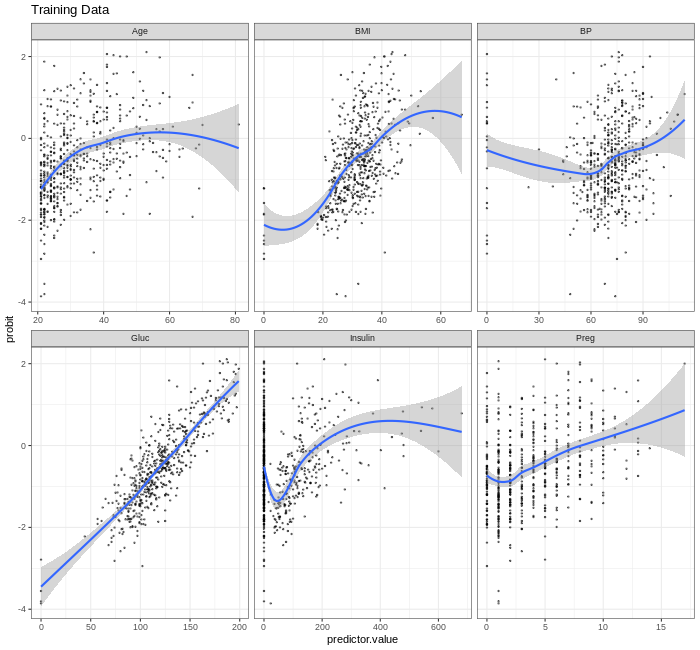

In [ ]:
%%R -w 700 -h 650 -u px
train.covariates <- train %>%
  select(Preg, Gluc, Insulin, BP, BMI, Age)
# save names of predictors to plug into command below.
  train.predictors <- colnames(train.covariates)

# Save predicted probabilities
  train.covariates$Prob <- fit.probit$fitted.values

# Manually calculate the probit values and tidy data for the plot
train.covariates<- train.covariates %>%
    mutate(probit = qnorm(Prob)) %>%
    select(-Prob) %>%
    gather(key = "predictors", value = "predictor.value", -probit)

# Then you can plot logit values over each of the numeric variables.
  ggplot(train.covariates, aes(y = probit, x = predictor.value))+
    geom_point(size = 0.5, alpha = 0.5) +
    geom_smooth(method = "loess") +
    theme_bw() +
    facet_wrap(~predictors, scales = "free_x") +
    ggtitle("Training Data")

### Cross-Validation

In [ ]:
%%R
# Set number of folds
k <- 10
folds <- cut(seq(1, nrow(mf)), breaks = k, labels = FALSE)

cv_probits <- numeric(nrow(mf))  # To store probit values for each observation

for (i in 1:k) {
  # Split the data into training and validation sets
  validation_indices <- which(folds == i, arr.ind = TRUE)
  validation_set <- mf[validation_indices, ]
  training_set <- mf[-validation_indices, ]

  # Fit the model on training set
  cv_model <- glm(Outcome~ ., data = mf, family = binomial(link = "probit"))

  # Predict probabilities on validation set
  validation_pred <- predict(cv_model, newdata = validation_set, type = "response")

  # Store the predicted probabilities
  cv_probits[validation_indices] <- validation_pred
}

# Calculate probit values from predicted probabilities
# Using the qnorm function to get probit values

mf.covariates <- mf %>%
  select(Preg, Gluc, Insulin, BP, BMI, Age)
  mf.predictors <- colnames(mf.covariates)

mf.covariates$probit <- qnorm(cv_probits)


# View the first few probit values
head(mf.covariates)

# A tibble: 6 × 7
   Preg  Gluc Insulin    BP   BMI   Age probit
  <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>  <dbl>
1     6   148       0    72  33.6    50  0.566
2     1    85       0    66  26.6    31 -1.71 
3     8   183       0    64  23.3    32  0.726
4     1    89      94    66  28.1    21 -1.82 
5     0   137     168    40  43.1    33  1.19 
6     5   116       0    74  25.6    30 -1.04 


`geom_smooth()` using formula = 'y ~ x'


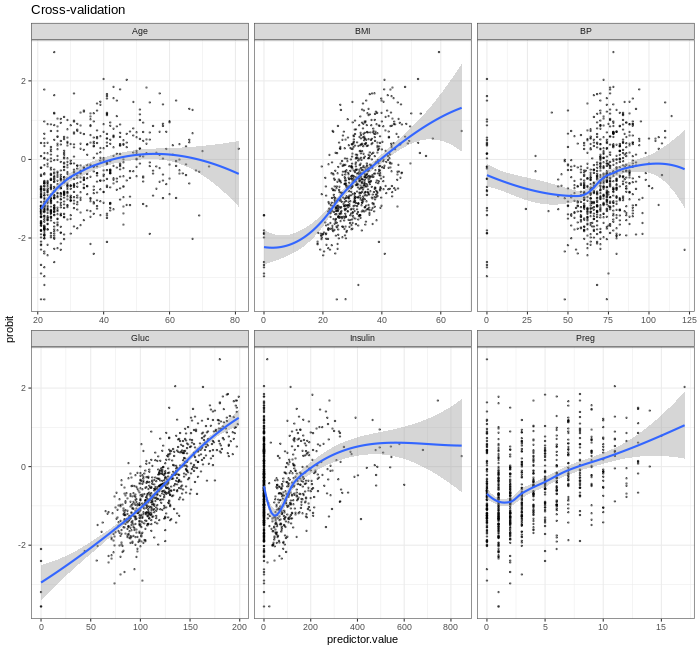

In [ ]:
%%R -w 700 -h 650 -u px

# Manually calculate the probit values and tidy data for the plot
mf.covariates<- mf.covariates %>%
    gather(key = "predictors", value = "predictor.value", -probit)
# Then you can plot logit values over each of the numeric variables.
  ggplot(mf.covariates, aes(y = probit, x = predictor.value))+
    geom_point(size = 0.5, alpha = 0.5) +
    geom_smooth(method = "loess") +
    theme_bw() +
    facet_wrap(~predictors, scales = "free_x")+
    ggtitle ("Cross-validation")

### Prediction at Test Data

In [ ]:
%%R
ggpredict(fit.probit, terms = "Preg[2:8, by = 1]")

# Predicted probabilities of Outcome

Preg | Predicted |     95% CI
-----------------------------
   2 |      0.26 | 0.21, 0.31
   3 |      0.28 | 0.24, 0.33
   4 |      0.30 | 0.26, 0.35
   5 |      0.32 | 0.28, 0.37
   6 |      0.35 | 0.29, 0.41
   7 |      0.37 | 0.30, 0.44
   8 |      0.39 | 0.31, 0.48

Adjusted for:
*    Gluc = 119.74
*      BP =  69.42
*    Skin =  20.23
* Insulin =  76.21
*     BMI =  31.71
*     DPF =   0.46
*     Age =  32.67


The `predict()` function for logistic models returns the default predictions of log-odds, which are probabilities on the logit scale. When type = `response`, the function provides the predicted probabilities.

In [ ]:
%%R
test$probs <- predict(fit.probit, test, returnData = TRUE,  type = "response")

In [ ]:
%%R
test$class <- ifelse(test$probs  > 0.5,"1","0")

`geom_smooth()` using formula = 'y ~ x'


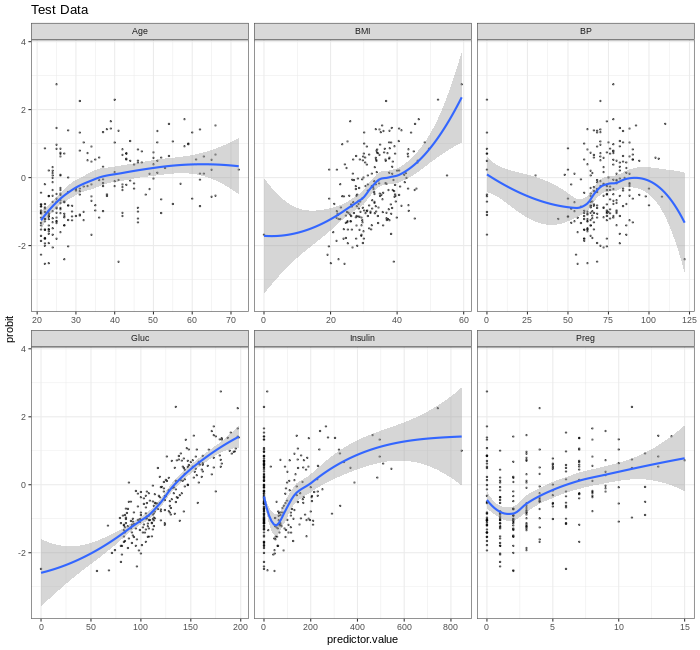

In [ ]:
%%R -w 700 -h 650 -u px
test.covariates <- test %>%
  select(Preg, Gluc, Insulin, BP, BMI, Age)
# save names of predictors to plug into command below.
  test.predictors <- colnames(test.covariates)

# Save predicted probabilities
  test.covariates$Prob <- predict(fit.probit, test, returnData = TRUE,  type = "response")

# Manually calculate the probit values and tidy data for the plot
test.covariates<- test.covariates %>%
    mutate(probit = qnorm(Prob)) %>%
    select(-Prob) %>%
    gather(key = "predictors", value = "predictor.value", -probit)

# Then you can plot logit values over each of the numeric variables.
  ggplot(test.covariates, aes(y = probit, x = predictor.value))+
    geom_point(size = 0.5, alpha = 0.5) +
    geom_smooth(method = "loess") +
    theme_bw() +
    facet_wrap(~predictors, scales = "free_x")+
    ggtitle ("Test Data")

## Summary and Conclusion

This R tutorial provides an overview of the Probit model, a statistical tool for modeling binary outcome variables. It guides users from understanding the theoretical foundations of the Probit model to implementing it in R. The Probit model is used when the dependent variable is binary and assumes that the relationship between independent variables and the probability of the event follows a cumulative normal distribution. The tutorial explains how to fit a model from scratch by calculating the likelihood function and using optimization techniques to obtain parameter estimates. It also demonstrates fitting a Probit model using R’s built-in `glm` function with the `binomial(link = "probit")` argument. This method streamlines the modeling process and provides functionalities for diagnostic checks. Participants learn to interpret coefficients, which reflect changes in the Z-score for unit changes in the predictors. To assess model performance, the tutorial employs cross-validation and evaluation on a hold-out test dataset. Cross-validation tests the model's stability across different data subsets, while the hold-out dataset evaluates accuracy, sensitivity, and specificity. By the end of the tutorial, participants gain a solid understanding of the Probit model, learning to fit models, interpret results, and evaluate performance. This equips them to effectively apply Probit regression in their research, making informed decisions based on the model's findings.

## References

1.  [Categorical Regression in Stata and R](https://bookdown.org/sarahwerth2024/CategoricalBook/probit-regression-r.html#running-a-probit-regression-in-r)

2.  [PROBIT REGRESSION \| R DATA ANALYSIS EXAMPLES](https://stats.oarc.ucla.edu/r/dae/probit-regression/)

3.  [Probit Regression in R, Python, Stata, and SAS](https://jbhender.github.io/Stats506/F18/GP/Group14.html)